<a href="https://colab.research.google.com/github/Kaavyyaaaa/Facial-Recognition-/blob/main/Best_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Final Report: Best Performing Model (7-Class)

This notebook loads our best-performing model, which was trained on all 7 emotions, and displays its final performance metrics.

Peak Validation Accuracy: 57.5%

In [1]:
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# --- Configuration ---
DRIVE_TEST_DIR = '/content/drive/MyDrive/Facial Expression Recognition/test'
LOCAL_TEST_DIR = '/content/dataset/test'
IMG_SIZE = 96
BATCH_SIZE = 64

# --- Copy Test Data Locally for Speed ---
print("Copying test data to local disk for faster prediction...")
os.makedirs(LOCAL_TEST_DIR, exist_ok=True)
!cp -r "{DRIVE_TEST_DIR}/"* "{LOCAL_TEST_DIR}/"
print("Done copying.")

# --- Create the 7-Class Test Generator from the LOCAL path ---
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    LOCAL_TEST_DIR,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=False
)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Copying test data to local disk for faster prediction...
Done copying.
Found 6391 images belonging to 7 classes.


Loading the best model from: /content/drive/MyDrive/ML Project/FacialRecognitionModels/model_baseline_57.5_percent_20250817-185044.keras
Model loaded successfully.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 58s 518ms/step

--- Final Classification Report (57.5% Model) ---
              precision    recall  f1-score   support

       angry       0.50      0.47      0.48       953
     disgust       0.74      0.15      0.26       110
        fear       0.54      0.22      0.31      1021
       happy       0.85      0.76      0.80      1763
     neutral       0.30      0.59      0.40       477
         sad       0.46      0.62      0.52      1242
    surprise       0.69      0.72      0.71       825

    accuracy                           0.57      6391
   macro avg       0.58      0.50      0.50      6391
weighted avg       0.61      0.57      0.57      6391


--- Final Confusion Matrix ---


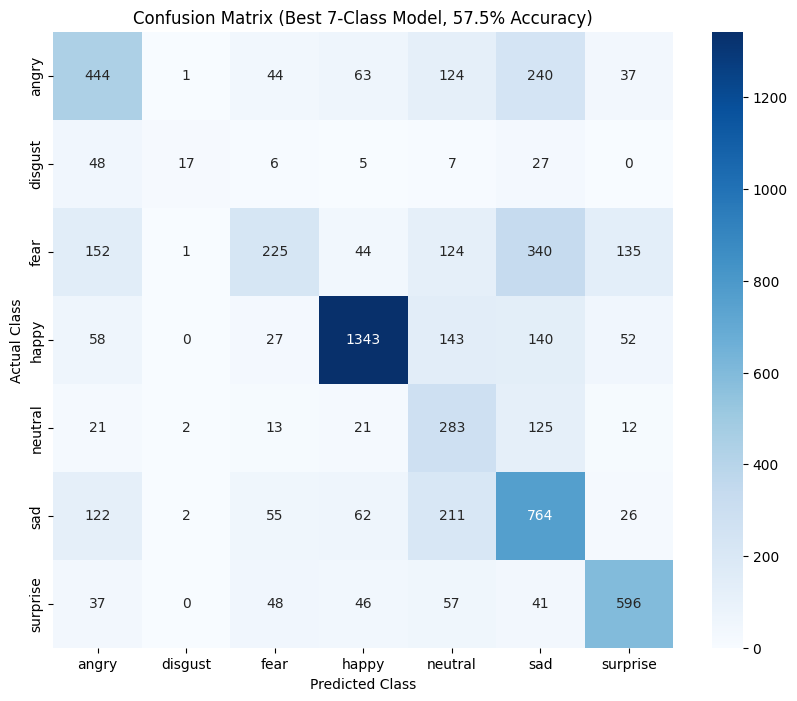

In [2]:
from tensorflow.keras.models import load_model

# --- 1. Load the Model ---

model_path = "/content/drive/MyDrive/ML Project/FacialRecognitionModels/model_baseline_57.5_percent_20250817-185044.keras"

print(f"Loading the best model from: {model_path}")
best_model = load_model(model_path)
print("Model loaded successfully.")

# --- 2. Evaluate the Model ---
test_generator.reset()
predictions = best_model.predict(test_generator, verbose=1)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# --- 3. Display Results ---
print("\n--- Final Classification Report (57.5% Model) ---")
print(classification_report(true_classes, predicted_classes, target_names=class_labels))
print("\n--- Final Confusion Matrix ---")
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix (Best 7-Class Model, 57.5% Accuracy)')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()